<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-199be3d80cad>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.var()

Unnamed: 0    21378.500000
CRIM             73.986578
ZN              543.936814
INDUS            47.064442
CHAS              0.064513
NOX               0.013428
RM                0.493671
AGE             792.358399
DIS               4.434015
RAD              75.816366
TAX           28404.759488
PTRATIO           4.686989
LSTAT            50.994760
MEDV             84.586724
dtype: float64

In [9]:
boston_df.head(10) 

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


# Task 1 Becoming familiar with the data set 

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



# Task 2 Generate Descriptive Statistics and Visualizations

### 2.1 BOXPLOT OF MEDIAN VALUE OWNER-OCCUPIED HOMES 

Text(0.5, 1.0, 'Boxplot of Median Value Owner-occupied Homes')

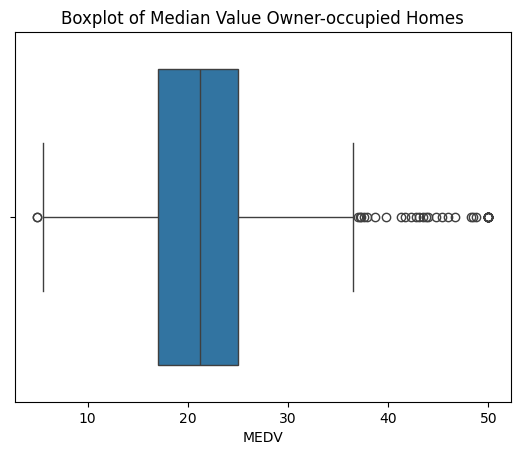

In [10]:
ax1 = sns.boxplot(x='MEDV', data=boston_df)
ax1.set_title('Boxplot of Median Value Owner-occupied Homes')

### 2.2 Bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles River Variable')

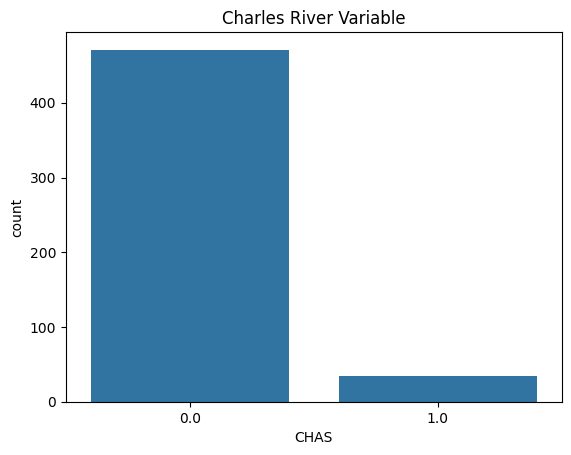

In [11]:
ax2 = sns.countplot(x='CHAS', data = boston_df) 
ax2.set_title('Charles River Variable')

### 2.3 Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 0, 'AGE Variable'),
 Text(0, 0.5, 'MEDV variable'),
 Text(0.5, 1.0, 'MEDV variable VS AGE variable')]

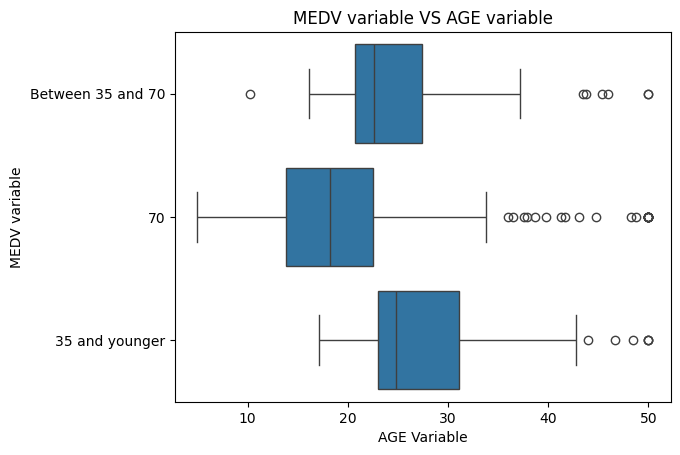

In [12]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group' ] = 'Between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 70, 'Age_Group'] = '70' 

ax3 = sns.boxplot(y = 'Age_Group' , x = 'MEDV', data = boston_df)
ax3.set(xlabel = 'AGE Variable' , ylabel = 'MEDV variable', title = 'MEDV variable VS AGE variable')

### 2.4 Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship

[Text(0.5, 0, 'NOX Concentrations (parts per 10 million)'),
 Text(0, 0.5, 'Proportion of non-retail busniess acres per town'),
 Text(0.5, 1.0, 'NOX and INDUS relationship')]

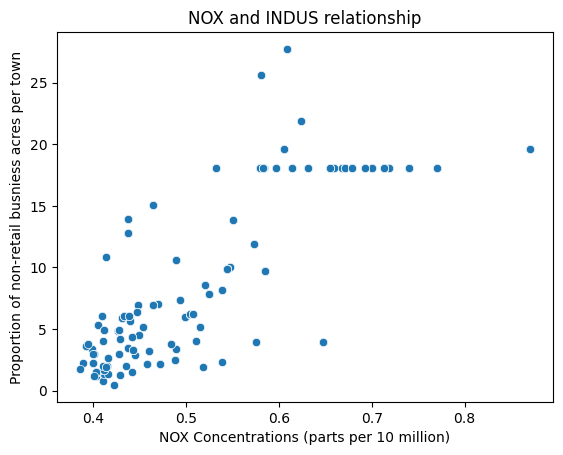

In [13]:
ax4 = sns.scatterplot(x = 'NOX' , y = 'INDUS', data = boston_df) 
ax4.set(xlabel = 'NOX Concentrations (parts per 10 million)', ylabel = 'Proportion of non-retail busniess acres per town', title = 'NOX and INDUS relationship') 

### 2.5 Histogram for the pupil to teacher ratio variable

[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of Pupil-Teacher ratio by town')]

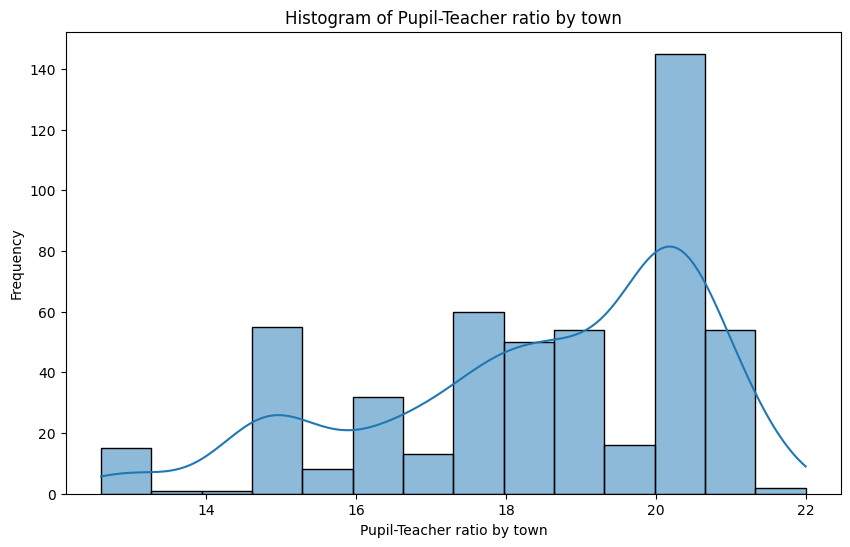

In [14]:
pyplot.figure(figsize = (10,6))
ax5 = sns.histplot(data = boston_df, x = 'PTRATIO', kde = True)
ax5.set(xlabel = 'Pupil-Teacher ratio by town' , ylabel = 'Frequency', title = 'Histogram of Pupil-Teacher ratio by town')

# Task 3: Use the appropriate tests to answer the questions provided.


### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0 = there is no significant difference in the median value of houses bounded by the Charles river

H1 = there is a significant difference in the median value of houses bounded by the Charles river

In [31]:
# Map CHAS to descriptive labels
boston_df['CHAS_T'] = boston_df['CHAS'].map({1: 'NEAR', 0: 'FAR'})

# Perform the T-test for independent samples
t_stat, p_value = scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'] ,
    boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'])

print('t stat =', (t_stat))
print('p value =', p_value)


t stat = -3.996437466090509
p value = 7.390623170519905e-05


#### P value is <0.05 therefore we reject the null hypothesis 

### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0 = there is no difference in the median value of houses for each proportion of occupied units built prior to 1940

H1 = there is a difference in the median value of houses for each proportion of occupied units built prior to 1940

In [23]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

In [24]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [25]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### We reject the null hypothesis as P value < 0.05. There is a difference in median values for ecah proportion of owner occupied units built prior to 1940.

H0: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

H1: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### The p-value is <0.05, we reject the null hypothesis and conclude that the relationship between nitric oxide concentrations and proportion of non-retail business acres per town exists


### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes

H1: Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [28]:
X = boston_df ['DIS']
y = boston_df ['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        16:52:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-value < 0.05, so we reject the null hypothesis as there is evidence that there is an impact in the median value of owner occupied homes.
